In [6]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# loading dataset
df = pd.read_csv('../out/extended_full_cleaned_paper.csv')

# get some overview on dataset
print(df.info)



<bound method DataFrame.info of                  filename                                      doi  \
0     plain_text__3300231  https://doi.org/10.1145/3290605.3300231   
1     plain_text__3300232  https://doi.org/10.1145/3290605.3300232   
2     plain_text__3300233  https://doi.org/10.1145/3290605.3300233   
3     plain_text__3300234  https://doi.org/10.1145/3290605.3300234   
4     plain_text__3300235  https://doi.org/10.1145/3290605.3300350   
...                   ...                                      ...   
3576  plain_text__3581572  https://doi.org/10.1145/3544548.3581572   
3577  plain_text__3581573  https://doi.org/10.1145/3544548.3581573   
3578  plain_text__3581574  https://doi.org/10.1145/3544548.3581574   
3579  plain_text__3581575  https://doi.org/10.1145/3544548.3581575   
3580  plain_text__3582074  https://doi.org/10.1145/3544548.3582074   

                                                authors  \
0     Lucas Franco  Colusso;Ridley  Jones;Sean  A. M...   
1     Nit

In [7]:
import re

#create list with all valid first occurences of ccs-categories per paper via dataset loaded above. extracted first_ccs categorie is saved into new column in df.
tmp_list = list()

for index, row in df.iterrows():
    tmp = str(row.specified_class).split(";")
    if tmp[0] == "nan":
        tmp[0] = "None"
    tmp_list.append(tmp[0])
df['first_ccs'] = pd.Series(tmp_list)    

In [8]:
df.to_csv('../out/extended_full_cleaned_paper_v2.csv', index=False) #save results to csv-file

In [75]:
# row cleaned_fulltext contains cleanded and via CCS_extraction.ipynb processed not empty fulltexts
df = df[df['cleaned_fulltext'].notnull()]
print(len(df))
X = df['cleaned_fulltext']  #column with processed data
y = df['first_ccs']  #first ccs categorization as groundtruth

#split up test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)  #use tf-idf vectorizer model to convert text into numeric representation
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("y dimension: ", y.shape)

3557
y dimension:  (3557,)


In [69]:
# intermezzo for visualizing
stats = df.first_ccs.value_counts()
stats


empirical studies in hci            514
human computer interaction (hci)    458
hci theory, concepts and models     158
security and privacy                143
interactive systems and tools       132
                                   ... 
multi / mixed media creation          1
graphics input devices                1
ubiquitous computing                  1
social network analysis               1
law                                   1
Name: first_ccs, Length: 121, dtype: int64

Index(['first_ccs'], dtype='object')


([], [])

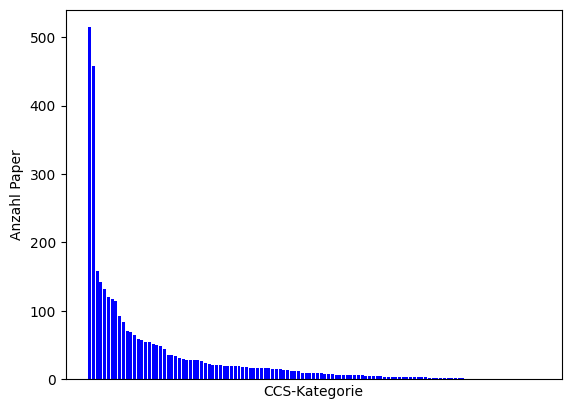

In [71]:
import matplotlib.pyplot as plt
# some more visualizing

stats = pd.DataFrame(columns=['first_ccs'], data=stats)
print(stats.columns)
stats_plt = stats.sort_values(by='first_ccs', ascending=False) #.iloc[0:20]
stats_plt
plt.bar(stats_plt.index, stats_plt.first_ccs, color='b')
plt.ylabel("Anzahl Paper")
plt.xlabel("CCS-Kategorie")    
plt.xticks(rotation=90)
plt.xticks([])
# plt.title("Anzahl der Keywords pro Paper")

In [76]:
# create and train svm-model
svm_model = SVC(kernel='linear') 
svm_model.fit(X_train_tfidf, y_train)

# predict ccs-category on test data for verification
y_pred = svm_model.predict(X_test_tfidf)

In [77]:

#get classification_report to verify quality
print(classification_report(y_test, y_pred))


                                                                   precision    recall  f1-score   support

                                                             None       0.00      0.00      0.00         2
                                                    accessibility       0.33      0.15      0.21        13
                      accessibility design and evaluation methods       0.00      0.00      0.00         0
                                  accessibility systems and tools       0.17      0.12      0.14         8
                                       accessibility technologies       0.00      0.00      0.00         2
                     accessibility theory, concepts and paradigms       0.00      0.00      0.00         3
                                             ambient intelligence       0.00      0.00      0.00         0
                                                applied computing       0.00      0.00      0.00         1
                                    

C:\Users\Dorian\PycharmProjects\TextClassification_Bachelor_final\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dorian\PycharmProjects\TextClassification_Bachelor_final\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dorian\PycharmProjects\TextClassification_Bachelor_final\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to con

In [ ]:
# optional: if wanted test model on manually added paper-samples
sample_paper_text = "Dies ist ein Beispieltext"  # put in some text example to be classified with model used above
sample_tfidf = vectorizer.transform([sample_paper_text])
sample_prediction = svm_model.predict(sample_tfidf)
print(f"Vorhergesagte CCS-Kategorisierung: {sample_prediction[0]}")
